# Belarus Used Cars Prices

 ********************************************************************


### Columns:
  
######                   1. make - machine firm
######                   2.model - model :)
######                   3.price USD - price in dollars (target variable)
######                   4.year - production year
######                   5.condition - represents the condition at the sale moment (with mileage, for parts, etc)
######                   6.mileage - mileage in kilometers
######                   7.fuel_type - type of the fuel (electro, petrol, diesel)
######                   8.volume of the engine
######                   9.color
######                   10.transmission
######                   11.drive unit
######                   12.segment (this feature was collected manually, so it could be wrong)

######                   -------------------Dataset link:https://www.kaggle.com/slavapasedko/belarus-used-cars-prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("cars.csv")

In [3]:
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


In [4]:
df.shape

(56244, 12)

In [5]:
df.info()     # there is some null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56244 entries, 0 to 56243
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 56244 non-null  object 
 1   model                56244 non-null  object 
 2   priceUSD             56244 non-null  int64  
 3   year                 56244 non-null  int64  
 4   condition            56244 non-null  object 
 5   mileage(kilometers)  56244 non-null  float64
 6   fuel_type            56244 non-null  object 
 7   volume(cm3)          56197 non-null  float64
 8   color                56244 non-null  object 
 9   transmission         56244 non-null  object 
 10  drive_unit           54339 non-null  object 
 11  segment              50953 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 5.1+ MB


In [6]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [7]:
df.loc[0:,df.dtypes=="O"].describe()    ## describe for object datatypes

,make,model,condition,fuel_type,color,transmission,drive_unit,segment
count,56244,56244,56244,56244,56244,56244,54339,50953
unique,96,1034,3,3,13,2,4,9
top,volkswagen,passat,with mileage,petrol,black,mechanics,front-wheel drive,D
freq,6861,2086,55278,36405,12385,36056,38016,12605


### exploratory data analysis

#### 1.missing values

In [8]:
nan=[x for x in df.columns if df[x].isnull().sum()>1]
for y in nan:
    print(y,":","{}%missing values".format(np.round(df[y].isnull().mean(),decimals=4)))  #total % of missing values

volume(cm3) : 0.0008%missing values
drive_unit : 0.0339%missing values
segment : 0.0941%missing values


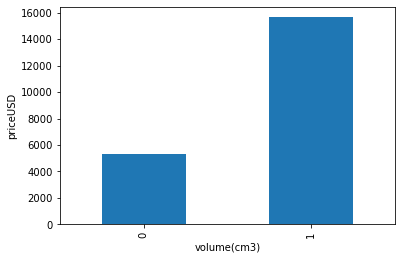

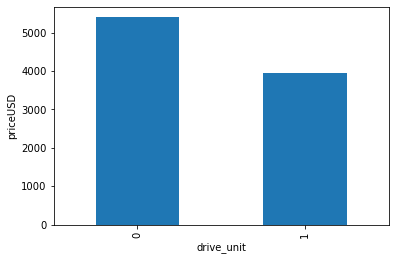

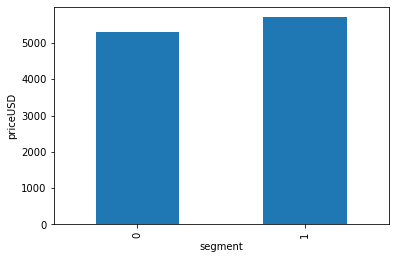

In [9]:
for i in nan:
    df2=df.copy()
    df2[i]=np.where(df[i].isnull()==True,1,0)
    df2.groupby(i)["priceUSD"].median().plot(kind="bar")
    plt.xlabel(i)
    plt.ylabel("priceUSD")
    plt.show()

##### There is some relationship between null values and the output column

#### 2.Temporal Variables(Eg: Datetime Variables)

In [10]:
date=[x for x in df.columns if x[0:2]=="ye"]

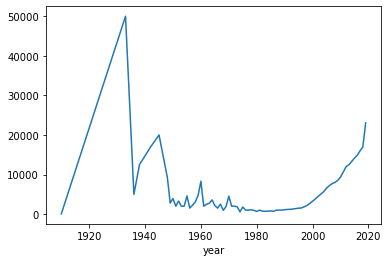

In [11]:
df.groupby(date)["priceUSD"].median().plot()    

##### we can observe that cars before 1940's and cars after 1980's has high value

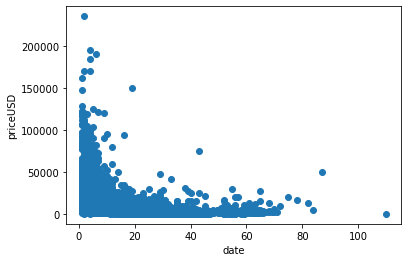

In [12]:
df3=df.copy()
df3[date]=2020-df3[date]
plt.scatter(df3[date],df3["priceUSD"])
plt.xlabel("date")
plt.ylabel("priceUSD")
plt.show()

##### we can observe that the recently produced car has high value then old and days car

#### 3.delaying withe numerical variables



In [13]:
numerical=[x for x in df.columns if df[x].dtypes!="O" and df[x].nunique()<=26 and x not in df["year"]]

In [14]:
numerical  # there is no descreate numerical values

[]

In [15]:
numerical1=[x for x in df.columns if df[x].dtypes!="O" and df[x].nunique()>=26 and x not in ["year"]]

In [16]:
numerical1

['priceUSD', 'mileage(kilometers)', 'volume(cm3)']

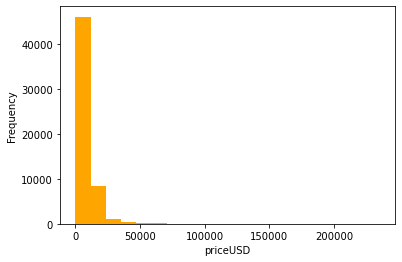

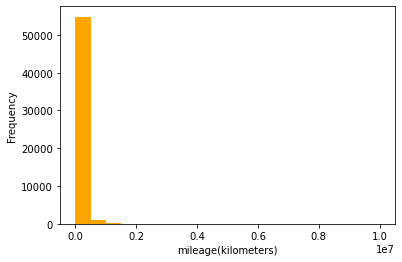

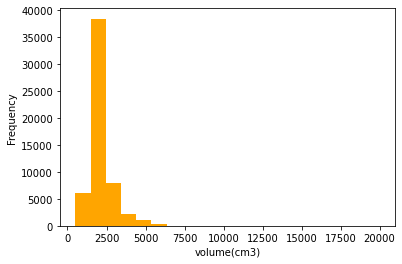

In [17]:
for i in numerical1:
    df[i].plot(kind="hist",bins=20,color="orange")
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

##### none of the columns are normaly distributed all the columns are right skewed

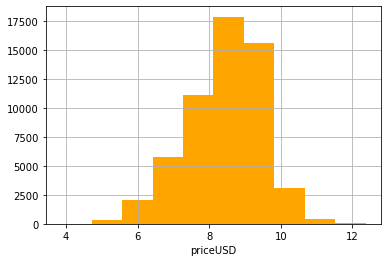

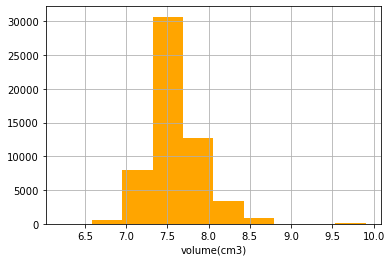

In [18]:
for i1 in numerical1:
    df4=df.copy()
    if 0  in df4[i1].unique():
        pass
    else:
       df4[i1]=np.log(df4[i1])
       df4[i1].hist(bins=10,color="orange")
       plt.xlabel(i1)
       plt.show()

##### log normal distribution

##### outlayers

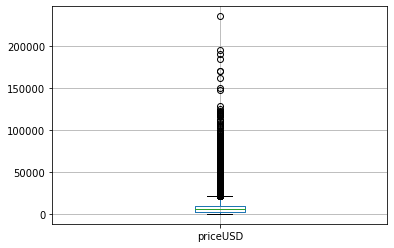

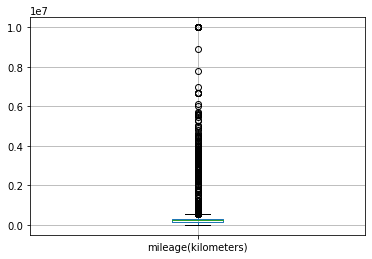

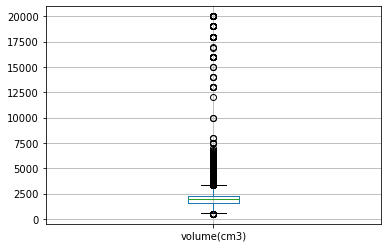

In [19]:
for i1 in numerical1:
    df.boxplot(column=i1)
    plt.show()

##### There are some outlayers

#### 4.catagorical values

In [20]:
cat_variables=[x for x in df.columns if df[x].dtypes=="O" and x not in ["Year"]]
cat_variables

['make',
 'model',
 'condition',
 'fuel_type',
 'color',
 'transmission',
 'drive_unit',
 'segment']

In [21]:
for i in cat_variables:
    print("The feature is {} and the unique variables is {}".format(i,df[i].nunique()))

The feature is make and the unique variables is 96
The feature is model and the unique variables is 1034
The feature is condition and the unique variables is 3
The feature is fuel_type and the unique variables is 3
The feature is color and the unique variables is 13
The feature is transmission and the unique variables is 2
The feature is drive_unit and the unique variables is 4
The feature is segment and the unique variables is 9


In [22]:
cat_variables.remove("make")
cat_variables.remove("model")           ### as make and model has high unique values it is not able to plot that columns in the graph

In [23]:
cat_variables

['condition', 'fuel_type', 'color', 'transmission', 'drive_unit', 'segment']

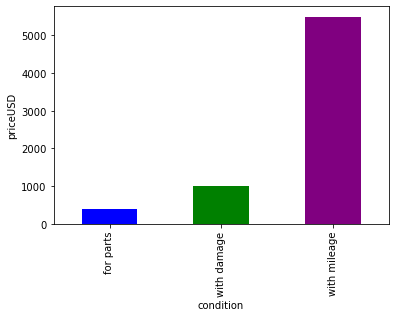

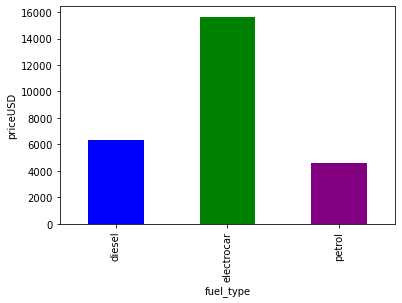

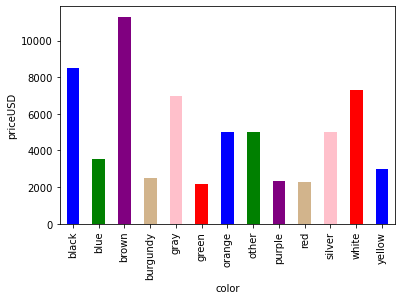

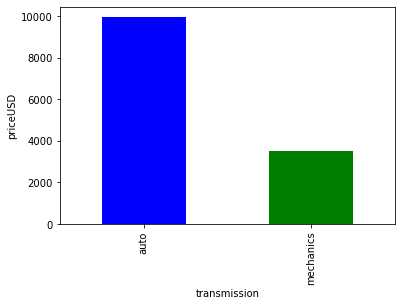

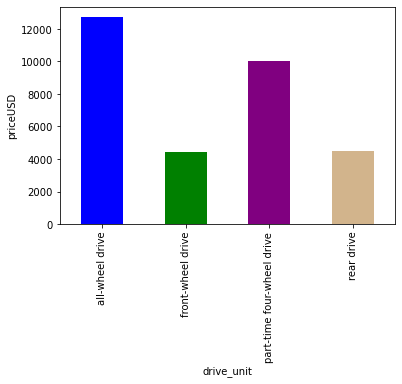

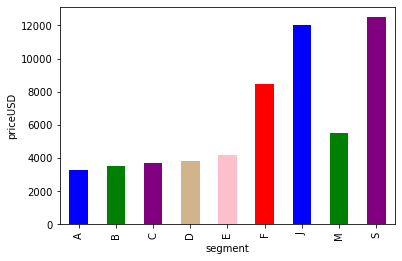

In [24]:
for y in cat_variables:
       df.groupby(y)["priceUSD"].median().plot(kind="bar",color= ['blue', 'green', 'purple', 'tan', 'pink', 'red'])
       plt.xlabel(y)
       plt.ylabel("priceUSD")
       plt.show()

In [25]:
df['make'].value_counts()

volkswagen        6861
audi              4030
bmw               4013
opel              3779
renault           3713
                  ... 
bogdan               1
roewe                1
shanghai-maple       1
tagaz                1
dong-feng            1
Name: make, Length: 96, dtype: int64

### feature engineering

#### 1.handling missing values

In [26]:
df["volume(cm3)"]=df["volume(cm3)"].astype(float)

In [27]:
nan=[x for x in df.columns if df[x].isnull().sum()>1]
for y in nan:
    print(y,":","{}%missing values".format(np.round(df[y].isnull().mean(),decimals=4)))  #total % of missing values

volume(cm3) : 0.0008%missing values
drive_unit : 0.0339%missing values
segment : 0.0941%missing values


In [28]:
df["drive_unit"].value_counts(dropna=False)

front-wheel drive             38016
rear drive                     6836
all-wheel drive                5890
part-time four-wheel drive     3597
NaN                            1905
Name: drive_unit, dtype: int64

In [29]:
df["volume(cm3)"].value_counts(dropna=False)

2000.0    10742
1600.0     8646
1800.0     5983
1900.0     3651
2500.0     3395
          ...  
2737.0        1
1325.0        1
1579.0        1
2193.0        1
2180.0        1
Name: volume(cm3), Length: 459, dtype: int64

In [30]:
df["segment"].value_counts(dropna=False)

D      12605
C      10617
J       8629
M       6313
E       6274
NaN     5291
B       4393
F        896
S        765
A        461
Name: segment, dtype: int64

##### as drive_unit , segment  are  catagorical values  and has missing values so we can convert missing values as one of the feature in that columns  and for volume(cm3) is a numerical column and has less missing values so we can do normal mean median imputation

In [31]:
def fun(nan1,df):
    df[nan1]=np.where(df[nan1].isnull()==True,"missing_values",df[nan1])


In [32]:
for i in nan:
    if "volume(cm3)" not in i : 
        fun(i,df)
    else:
        df[i].fillna(df[i].median(),inplace=True)

In [33]:
df.info()          ## handled all the null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56244 entries, 0 to 56243
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 56244 non-null  object 
 1   model                56244 non-null  object 
 2   priceUSD             56244 non-null  int64  
 3   year                 56244 non-null  int64  
 4   condition            56244 non-null  object 
 5   mileage(kilometers)  56244 non-null  float64
 6   fuel_type            56244 non-null  object 
 7   volume(cm3)          56244 non-null  float64
 8   color                56244 non-null  object 
 9   transmission         56244 non-null  object 
 10  drive_unit           56244 non-null  object 
 11  segment              56244 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 5.1+ MB


### normalising our data

In [34]:
dis_features=[x for x in df.columns if df[x].dtypes!="O" and df[x].nunique()>=25 and x not in ["year"] ]
dis_features

['priceUSD', 'mileage(kilometers)', 'volume(cm3)']

In [35]:
import scipy.stats as stat
import pylab

In [36]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist(color="orange")
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

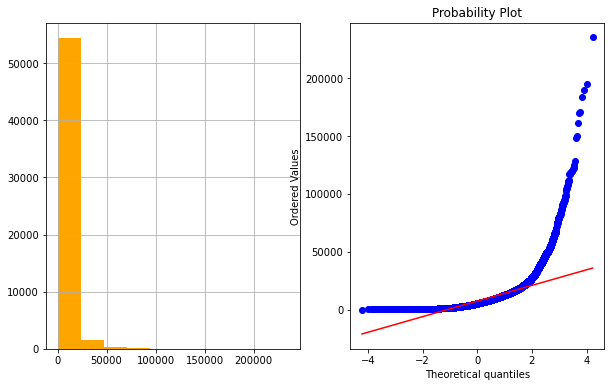

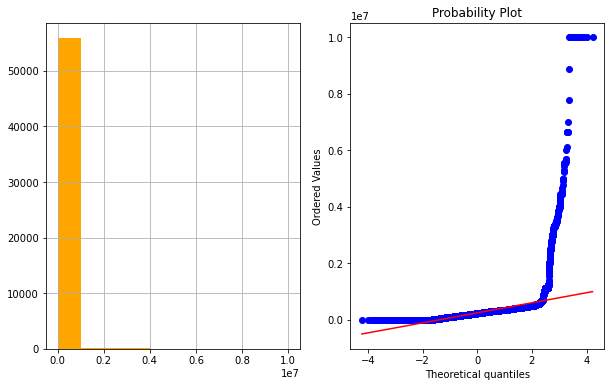

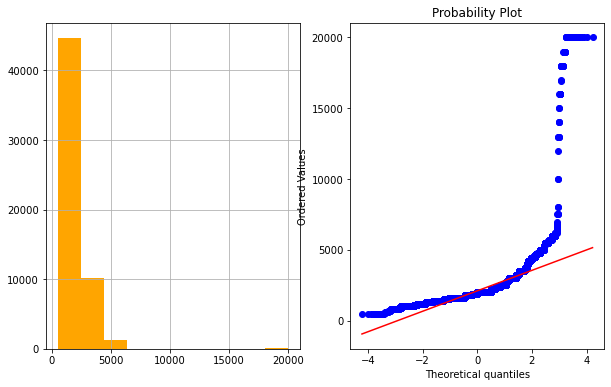

In [37]:
for i in  dis_features:
    plot_data(df,i)

##### before normalising our data

In [38]:
for i1 in dis_features:
    if 0  in df4[i1].unique():
        pass
    else:
        df[i1]=np.log(df[i1])

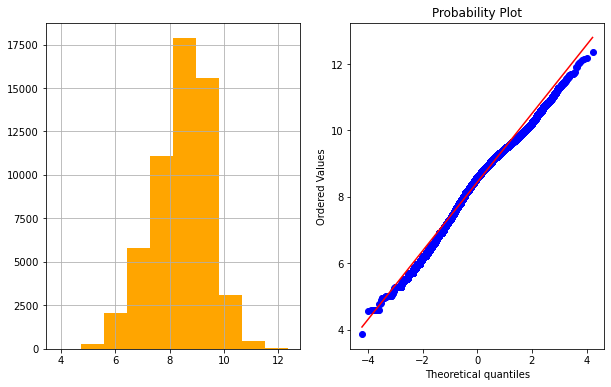

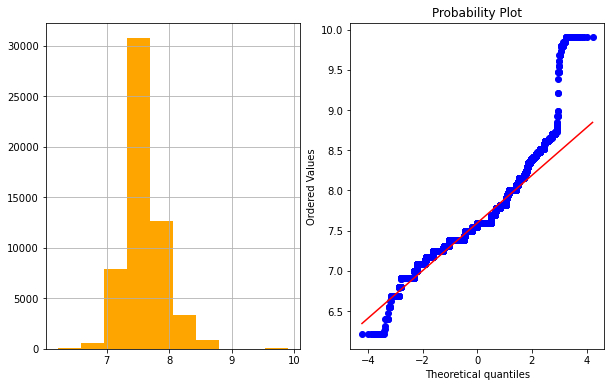

In [39]:
plot_data(df,"priceUSD")
plot_data(df,'volume(cm3)')


##### after normalising our data 

### handling  outlayers 

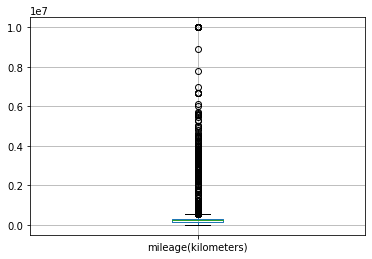

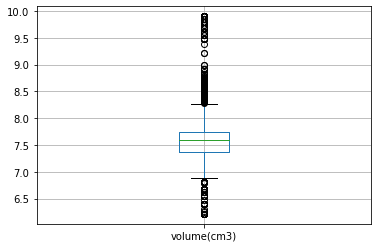

In [40]:
for i in dis_features:
    if "priceUSD" not in i:   # no need handle outlayers for targrt column
         df.boxplot(column=i)
         plt.show()

In [41]:
for i in dis_features:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_bridge=df[i].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[i].quantile(0.75)+(IQR*1.5)
    print(lower_bridge), print(upper_bridge)
    df.loc[df[i]>upper_bridge,[i]]=upper_bridge
    df.loc[df[i]<lower_bridge,[i]]=lower_bridge

5.619073815176561
11.333998593740946
-122500.0
569500.0
6.8334006676938195
8.285022642451295


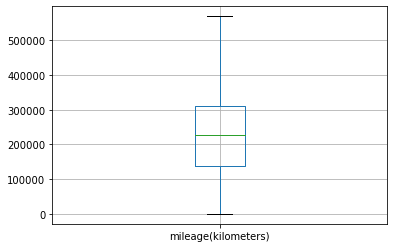

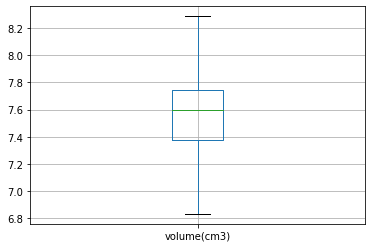

In [42]:
for i in dis_features:
    if "priceUSD" not in i:   # no need handle outlayers for targrt column
         df.boxplot(column=i)
         plt.show()

#### outlayers has been handled                   ### as we have handled outlayere our data still it will become better normalised data

### one hot encoding

In [43]:
df.drop(columns=["make","model"],axis=1,inplace=True)  ## as this columns are not much needed

In [44]:
cat_values=[x for x in df.columns if df[x].dtypes=="O"]
cat_values

['condition', 'fuel_type', 'color', 'transmission', 'drive_unit', 'segment']

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder() 
for i in cat_values:
    df[i]=label_encoder.fit_transform(df[i])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56244 entries, 0 to 56243
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   priceUSD             56244 non-null  float64
 1   year                 56244 non-null  int64  
 2   condition            56244 non-null  int32  
 3   mileage(kilometers)  56244 non-null  float64
 4   fuel_type            56244 non-null  int32  
 5   volume(cm3)          56244 non-null  float64
 6   color                56244 non-null  int32  
 7   transmission         56244 non-null  int32  
 8   drive_unit           56244 non-null  int32  
 9   segment              56244 non-null  int32  
dtypes: float64(3), int32(6), int64(1)
memory usage: 3.0 MB


#### one hot encoding has been done

### multicollinearity check

In [47]:
df["year"]=2020-df["year"]  ## as we cannot pass date columns to our model so we  convert them

In [48]:
x=df.iloc[0:,1:10]
y=df.iloc[0:,[0]]

In [49]:
y

,priceUSD
0,8.612503
1,8.584852
2,8.853665
3,8.101678
4,8.556414
...,...
56239,8.202482
56240,8.318742
56241,8.188689
56242,8.006368


In [50]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_scaled = scaler.fit_transform(x)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables =X_scaled
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = x.columns

In [52]:
vif       ## there is no multicollinearity in our data

,VIF,Features
0,1.602774,year
1,1.020725,condition
2,1.361772,mileage(kilometers)
3,1.160629,fuel_type
4,1.673621,volume(cm3)
5,1.022262,color
6,1.691574,transmission
7,1.066118,drive_unit
8,1.220933,segment


##### There is no multicollinearity in our data

### PCA

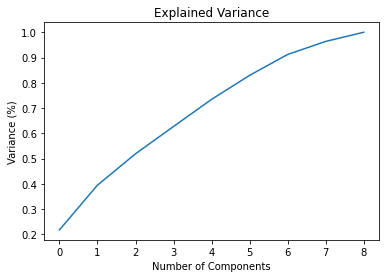

In [53]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [54]:
col=[]
for i in range(1,8):
  i=str(i)
  col.append("PCA_"+i)
pca = PCA(n_components=7)
new_data = pca.fit_transform(X_scaled)
  # This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data
             , columns =col)

In [55]:
principal_Df            

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,0.993615,-1.658914,0.194941,-0.807985,0.329735,0.119999,-0.221782
1,0.968486,-2.071204,0.294663,-1.283334,0.817844,0.447587,0.022295
2,-0.154129,-2.363678,0.400205,0.515775,-0.943842,-0.110086,-1.238547
3,1.821260,-0.485845,-1.537691,0.496401,-0.528337,0.569226,-1.122704
4,0.929984,-1.375526,-1.194865,-0.474981,0.591446,1.309925,-0.643601
...,...,...,...,...,...,...,...
56239,0.388663,0.416433,-0.060420,0.452023,-0.418874,-0.760741,1.279853
56240,0.122728,1.564036,-1.198943,-0.406491,0.973558,0.082263,0.862275
56241,0.340659,1.696334,-1.236943,-0.104322,0.638467,-0.048180,0.802853
56242,0.420597,0.938856,0.238168,-0.569008,0.526233,-0.918110,1.453782


##### our independent column

### finding average training and test accuracy using RandomForestRegressor

In [56]:
from sklearn.model_selection import KFold

In [57]:
kfold = KFold(n_splits=15,random_state= 42)
kfold.get_n_splits(principal_Df)

C:\Users\kisho\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


15

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
from sklearn.model_selection import KFold
from statistics import mean
regression = RandomForestRegressor(n_estimators = 100, random_state = 0)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(principal_Df):
    X_train, X_test = principal_Df.iloc[train_index],principal_Df.iloc[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index,0], y.iloc[test_index,0] # y is a dataframe so we have to use "iloc" to retreive data
    regression.fit(X_train,y_train)
    train_score_ = regression.score(X_train,y_train)
    test_score_ =regression.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.978667485868673 and test score is :   0.721291321693103
for k =  2
train_score is :   0.9789002553305395 and test score is :   0.6058681857016612
for k =  3
train_score is :   0.9785371659635486 and test score is :   0.7151658330106203
for k =  4
train_score is :   0.9788071659517763 and test score is :   0.751603798868173
for k =  5
train_score is :   0.9784723835642023 and test score is :   0.8205857955293536
for k =  6
train_score is :   0.9784428577048001 and test score is :   0.830042469195801
for k =  7
train_score is :   0.9782849322585566 and test score is :   0.8451416306116301
for k =  8
train_score is :   0.9783453480943656 and test score is :   0.8520926910472871
for k =  9
train_score is :   0.978087356415471 and test score is :   0.8731921766209175
for k =  10
train_score is :   0.9788830561097823 and test score is :   0.8079227570053955
for k =  11
train_score is :   0.9788064596605336 and test score is :   0.8007505657375953
for k =  12
t

#### This will be the average train and test accuracy but by using hyperparameter tuning we can increase some what the train and test accuracy

### Model-1

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LinearRegression

In [63]:
x_train,x_test,y_train,y_test=train_test_split(principal_Df,y,test_size=0.35,random_state=0)

In [64]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [65]:
pred=model.predict(x_test)

In [68]:
model.score(x_train,y_train)   #train accuracy

0.7362547716148125

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)                     #test accuracy

0.7362970400561523

In [72]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)                 #mean squared error

0.28544627656415317

##### as mean squared error is large and accuracy is low so linear regression is not best model for this data

### model-2

In [ ]:
from xgboost import XGBRFRegressor

In [213]:
import xgboost as xg

In [214]:
model2=xg.XGBRegressor(objective="reg:linear")
model2.fit(x_train,y_train)

[12:16:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:16:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [215]:
model2.score(x_train,y_train)    #train accuracy

0.9004756082462666

In [216]:
pred1=model2.predict(x_test)     #test accuracy
r2_score(y_test,pred1) 

0.8429276129788441

In [217]:
mean_squared_error(y_test,pred1)      #mean squared error

0.17002360548315334

##### hyper parameter tuning

In [218]:
from sklearn.model_selection import RandomizedSearchCV

In [219]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [220]:
model3=xg.XGBRegressor(objective="reg:linear")

In [221]:
random_search=RandomizedSearchCV(model3,param_distributions=params,n_jobs=-1,cv=5,verbose=3)

In [222]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   35.8s finished


[12:17:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [223]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [224]:
model3=xg.XGBRegressor(objective="reg:linear",min_child_weight=3,max_depth=10,learning_rate=0.1,gamma=0.4,colsample_bytree=0.7)
model3.fit(x_train,y_train)

[12:17:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[12:17:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [225]:
pred2=model3.predict(x_test)

In [228]:
model3.score(x_train,y_train)     #train score

0.9243220693061667

In [229]:
r2_score(y_test,pred2)            #test score

0.8467783875885146

In [230]:
mean_squared_error(y_test,pred2)   #mean squared error

0.16585531979363247

### best model:xgboost